<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ingeniería de feature

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

# Primeros pasos en la ingeniería de características y scikit-learn

## 1 - Ingeniería de features - Data augmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({
      "Name": ["Inove", "Python", "Max",
                "Mirta", "Max", "SQL", "SQLite"],
      "Age": [12, 29, 35, 93, 40, 13, 20],
      "Nationality": ["Argentina", "Holanda", "Estados Unidos",
                      "Argentina", "Estados Unidos",
                      "Inglaterra", "Estados Unidos"]}
      )
df

,Name,Age,Nationality
0,Inove,12,Argentina
1,Python,29,Holanda
2,Max,35,Estados Unidos
3,Mirta,93,Argentina
4,Max,40,Estados Unidos
5,SQL,13,Inglaterra
6,SQLite,20,Estados Unidos


In [3]:
# Crear una nueva columna "mayor de edad" como resultado de analizar la edad y la nacionalidad
df2 = df.copy()
df2['mayor_edad'] = df2.apply(lambda x: True if x['Age'] >= 21 else True if (x['Age'] >= 18 and x['Nationality'] == 'Argentina') else False, axis=1)
df2

,Name,Age,Nationality,mayor_edad
0,Inove,12,Argentina,False
1,Python,29,Holanda,True
2,Max,35,Estados Unidos,True
3,Mirta,93,Argentina,True
4,Max,40,Estados Unidos,True
5,SQL,13,Inglaterra,False
6,SQLite,20,Estados Unidos,False


## 3 - Encoding

#### Label Encoding

In [4]:
# Label Encoding
df3 = df.copy()
# Crear el Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Entrenar al encoder:
# 1) fit --> busca la cantidad de clases posibles
# 2) transform --> darles un número
label_encoding = le.fit_transform(df3['Nationality'])
# Crear una nueva columna con el resultado del encoding
df3['Nationality_LE'] = label_encoding
# Imprimir la cantidad de clases detectadas
print(le.classes_)
df3

['Argentina' 'Estados Unidos' 'Holanda' 'Inglaterra']


,Name,Age,Nationality,Nationality_LE
0,Inove,12,Argentina,0
1,Python,29,Holanda,2
2,Max,35,Estados Unidos,1
3,Mirta,93,Argentina,0
4,Max,40,Estados Unidos,1
5,SQL,13,Inglaterra,3
6,SQLite,20,Estados Unidos,1


#### OneHotEncoding

In [5]:
# One Hot Encoding
df4 = df3.copy()
# Crear OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
# Para poder utilizar OneHotEncoding debe haber realizado
# previamente el label_encoding a números
# Entrenar al encoder:
one_hot_encoding = onehot_encoder.fit_transform(label_encoding.reshape(-1, 1))
# Crear las columnas con el resultado del encoder
one_hot_encoding_df = pd.DataFrame(one_hot_encoding, columns=le.classes_, dtype=int)
one_hot_encoding_df

,Argentina,Estados Unidos,Holanda,Inglaterra
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,0,1
6,0,1,0,0


In [6]:
# Si quisieramos agregarle algun prefijo:
one_hot_encoding__prefix_df = one_hot_encoding_df.add_prefix('Nationality_')
one_hot_encoding__prefix_df


,Nationality_Argentina,Nationality_Estados Unidos,Nationality_Holanda,Nationality_Inglaterra
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,0,1
6,0,1,0,0


In [7]:
# Resultado final
df4 = df4.join(one_hot_encoding_df)
df4

,Name,Age,Nationality,Nationality_LE,Argentina,Estados Unidos,Holanda,Inglaterra
0,Inove,12,Argentina,0,1,0,0,0
1,Python,29,Holanda,2,0,0,1,0
2,Max,35,Estados Unidos,1,0,1,0,0
3,Mirta,93,Argentina,0,1,0,0,0
4,Max,40,Estados Unidos,1,0,1,0,0
5,SQL,13,Inglaterra,3,0,0,0,1
6,SQLite,20,Estados Unidos,1,0,1,0,0


#### Binary Encoding

In [8]:
class BinaryEncoder():
    def __init__(self):
        self.n_bits = 0
    
    def fit(self, data):
        if data.__class__.__name__ == list.__name__:
          self.n_bits = int(np.ceil(np.log2(max(data)+1))) + 1
        elif type(data).__module__ == pd.core.series.__name__:          
          self.n_bits = int(np.ceil(np.log2(data.max()+1))) + 1
        elif type(data).__module__ == np.__name__:
          self.n_bits = int(np.ceil(np.log2(data.max()+1))) + 1
        else:
          raise ValueError("Allowed list, numpy or pandas serie data")

    def transform(self, data):
        binary_encoding = [format(int(x+1), '0'+str(self.n_bits)+'b') for x in data]
        binary_encoding_split = [list(x) for x in binary_encoding]
        binary_encoding_header = ['b'+str(x) for x in reversed(range(self.n_bits))]
        return pd.DataFrame(binary_encoding_split, columns=binary_encoding_header, dtype=int)

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [9]:
df5 = df3.copy()
# Crear el encoder
be = BinaryEncoder()
# Entrenar el encoder
be_df = be.fit_transform(df5['Nationality_LE'])
be_df

,b2,b1,b0
0,0,0,1
1,0,1,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,1,0


In [10]:
df5 = df5.join(be_df)
df5

,Name,Age,Nationality,Nationality_LE,b2,b1,b0
0,Inove,12,Argentina,0,0,0,1
1,Python,29,Holanda,2,0,1,1
2,Max,35,Estados Unidos,1,0,1,0
3,Mirta,93,Argentina,0,0,0,1
4,Max,40,Estados Unidos,1,0,1,0
5,SQL,13,Inglaterra,3,1,0,0
6,SQLite,20,Estados Unidos,1,0,1,0


#### Codificiar nuevo valor

In [11]:
# Nuevo valor
label = 'Holanda'
# Transformación a label encoding
l_encoding = le.transform([label])
print('LabelEncoder:\n', l_encoding)
# Transformación a one hot encoding
oh_encoding = onehot_encoder.transform(l_encoding.reshape(-1, 1))
print('OneHoteEncoding:\n', oh_encoding)
# Transformación a binary encoding
b_encoding = be.transform(l_encoding)
print('BinaryEncoder:\n', b_encoding)

LabelEncoder:
 [2]
OneHoteEncoding:
 [[0. 0. 1. 0.]]
BinaryEncoder:
   b2 b1 b0
0  0  1  1


# 4 - Estandarización y normalización

In [25]:
# Datos que utilizaremos para ensayar
# Datos con una distribución normal
n1 = np.random.normal(loc=1000, scale=200, size=(1000))
n2 = np.random.normal(loc=1400, scale=50, size=(100))
n3 = np.random.normal(loc=2000, scale=50, size=(50))
data = np.append(n1, n2)
data_n = np.append(data, n3)

# Datos con una distribución uniforme
n1 = np.linspace(500, 1000, 1000)
n2 = np.linspace(1800, 2200, 100)
data_u = np.append(n1, n2)

In [13]:
def plot_scalers(normal, uniform):
    fig = plt.figure(figsize=(16,3))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1 = sns.histplot(normal, label='normal', ax=ax1)
    ax2 = sns.histplot(uniform, label='uniform', ax=ax2)
    ax1.legend()
    ax2.legend()
    plt.show()

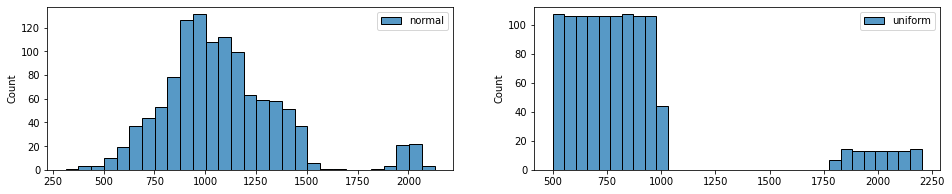

In [14]:
plot_scalers(data_n, data_u)

#### StandardScaler (estandarización)

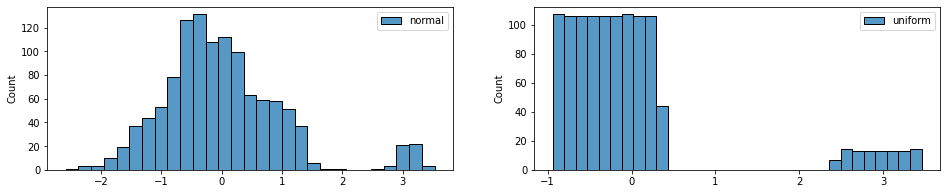

In [15]:
from sklearn.preprocessing import StandardScaler
scaler1_n = StandardScaler()
scaler1_u = StandardScaler()
data_n_standar = scaler1_n.fit_transform(data_n.reshape(-1, 1))
data_u_standar = scaler1_u.fit_transform(data_u.reshape(-1, 1))

plot_scalers(data_n_standar, data_u_standar)

#### MinMaxScaler (normalización)

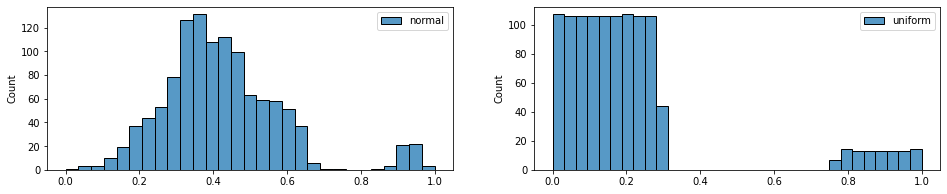

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler2_n = MinMaxScaler()
scaler2_u = MinMaxScaler()
data_n_norm = scaler2_n.fit_transform(data_n.reshape(-1, 1))
data_u_norm = scaler2_u.fit_transform(data_u.reshape(-1, 1))

plot_scalers(data_n_norm, data_u_norm)

#### RobustScaler (estandarización)

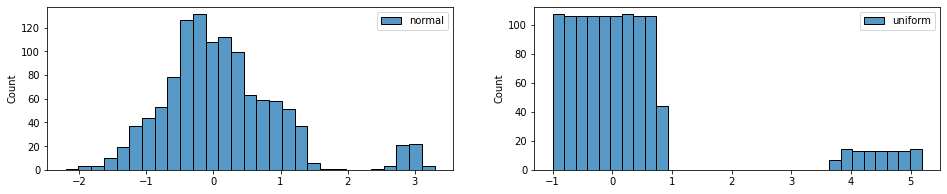

In [17]:
from sklearn.preprocessing import RobustScaler
scaler3_n = RobustScaler()
scaler3_u = RobustScaler()
data_n_robust = scaler3_n.fit_transform(data_n.reshape(-1, 1))
data_u_robust = scaler3_u.fit_transform(data_u.reshape(-1, 1))

plot_scalers(data_n_robust, data_u_robust)

## 5 - Métricas

#### Métricas para valores continuos

In [18]:
df6 = df.copy()
# Deseamos predecir las edades de las personas
df6['y_hat'] = [15, 29, 34, 85, 37, 12, 20]
y = df6['Age']
y_hat = df6['y_hat']
df6

,Name,Age,Nationality,y_hat
0,Inove,12,Argentina,15
1,Python,29,Holanda,29
2,Max,35,Estados Unidos,34
3,Mirta,93,Argentina,85
4,Max,40,Estados Unidos,37
5,SQL,13,Inglaterra,12
6,SQLite,20,Estados Unidos,20


In [19]:
# Calcular el error absoluto medio (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_hat)

2.2857142857142856

In [20]:
# Calcular el error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

12.0

#### Métricas para clasificación

In [21]:
df7 = df.copy()
# Deseamos clasificar si la nacionalidad de la persona es Argentina (1) o no(0)
df7['Argentina'] = df6['Nationality'].apply(lambda x: 1 if x == 'Argentina' else 0)
# Inventamos los resultados de un clasificador para evaluar
df7['y_hat'] = [1, 0, 0, 0, 0, 1, 1]
y = df7['Argentina']
y_hat = df7['y_hat']
df7

,Name,Age,Nationality,Argentina,y_hat
0,Inove,12,Argentina,1,1
1,Python,29,Holanda,0,0
2,Max,35,Estados Unidos,0,0
3,Mirta,93,Argentina,1,0
4,Max,40,Estados Unidos,0,0
5,SQL,13,Inglaterra,0,1
6,SQLite,20,Estados Unidos,0,1


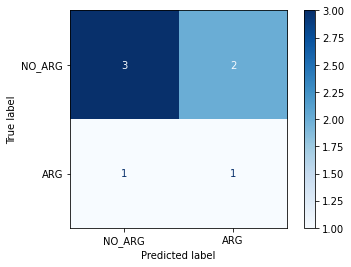

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO_ARG','ARG'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat, normalize=True)

0.5714285714285714

In [24]:
# Calcular el f1_score
from sklearn.metrics import f1_score
f1_score(y, y_hat)

0.4